# Data Exploration and Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [ ]:
df = pd.read_csv('/content/drive/My Drive/AI Project/spotify_dataset.csv', skiprows=1, names=['user_id', 'artistname', 'trackname', 'playlistname'], on_bad_lines='skip')
spotify_df = df.sample(n=100000, random_state=42)
spotify_df.head()

,user_id,artistname,trackname,playlistname
7578551,5c2b840d66d02ac7aa6a069eddd17f48,Spice Girls,Wannabe - Radio Edit,Lol HiGh Sk00l MeMorIeZ
911963,6da651f45aac18e5da52433aa3c38947,Flying Lotus,Descent Into Madness (feat. Thundercat),Best of 2014
8049506,20350023c94899ce25cd1a86ea385853,Kristin Hersh,Your Ghost,Ladies. All the ladies.
11247838,f9809d1afbab1b0aaa0c2f678a90752a,Rotary Connection,This Town,To listen to
6160700,db9646b77f3a677040b9140489da16f1,Bastille,Pompeii,Starred


In [ ]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 7578551 to 4679259
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       100000 non-null  object
 1   artistname    99729 non-null   object
 2   trackname     100000 non-null  object
 3   playlistname  99990 non-null   object
dtypes: object(4)
memory usage: 3.8+ MB


In [ ]:
spotify_df.shape

(100000, 4)

In [ ]:
spotify_df.describe()

,user_id,artistname,trackname,playlistname
count,100000,99729,100000,99990
unique,11838,26668,72164,38211
top,4398de6902abde3351347b048fcdc287,Coldplay,Intro,Starred
freq,2173,290,54,10455


In [ ]:
spotify_df.isnull().sum()

user_id           0
artistname      271
trackname         0
playlistname     10
dtype: int64

In [ ]:
spotify_df.dropna(inplace=True)
spotify_df.isnull().sum()

user_id         0
artistname      0
trackname       0
playlistname    0
dtype: int64

In [ ]:
# to check for the duplicates
spotify_df[spotify_df.duplicated()]

,user_id,artistname,trackname,playlistname


In [ ]:
# dropping the duplicates
spotify_df = spotify_df.drop_duplicates(keep='first')

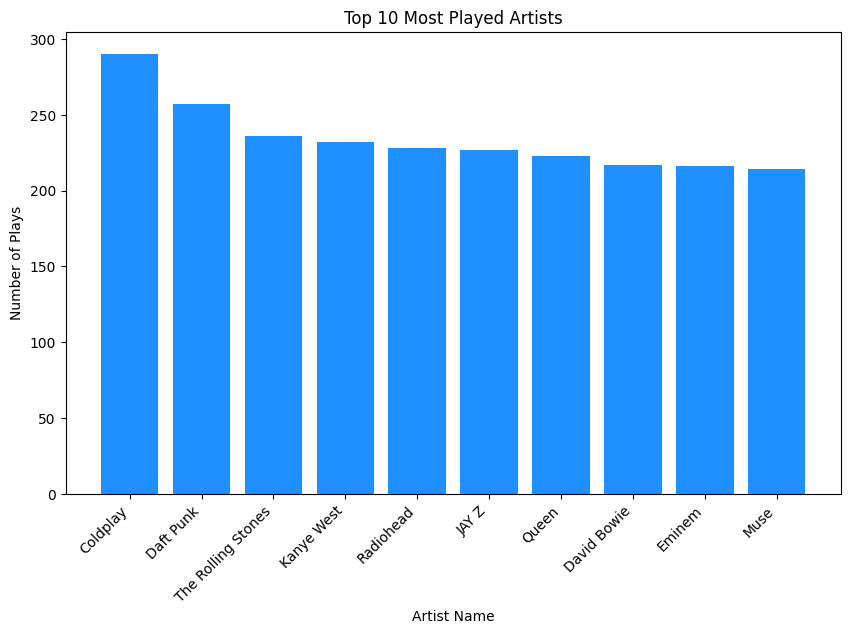

In [ ]:
import matplotlib.pyplot as plt

# Calculate the top 10 most played artists
top_artists = spotify_df['artistname'].value_counts().head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(top_artists.index, top_artists.values, color='dodgerblue')  # Plot a bar chart
plt.xlabel('Artist Name')  # Set the x-axis label
plt.ylabel('Number of Plays')  # Set the y-axis label
plt.title('Top 10 Most Played Artists')  # Set the title
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.show()  # Display the plot


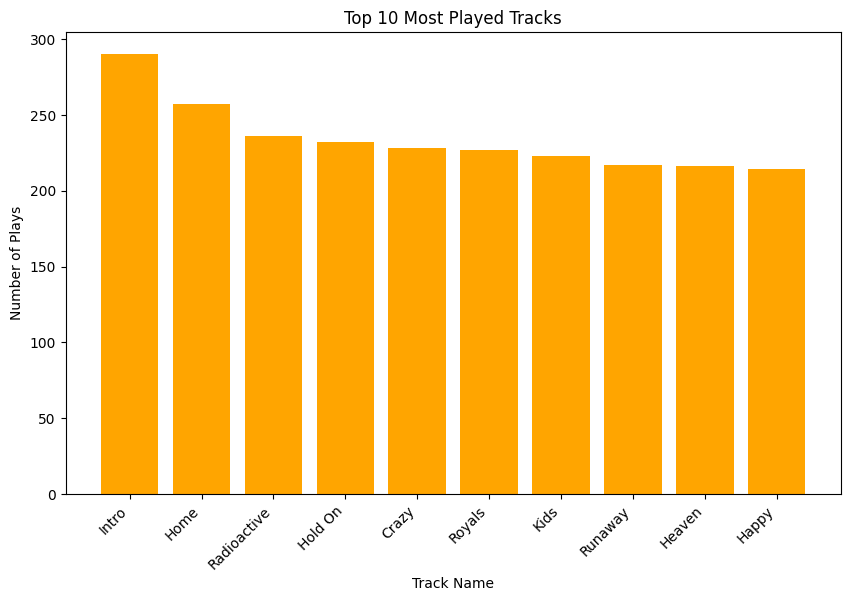

In [ ]:
# Calculate the top 10 most played artists
top_tracks = spotify_df['trackname'].value_counts().head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(top_tracks.index, top_artists.values, color='orange')  # Plot a bar chart
plt.xlabel('Track Name')  # Set the x-axis label
plt.ylabel('Number of Plays')  # Set the y-axis label
plt.title('Top 10 Most Played Tracks')  # Set the title
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.show()  # Display the plot

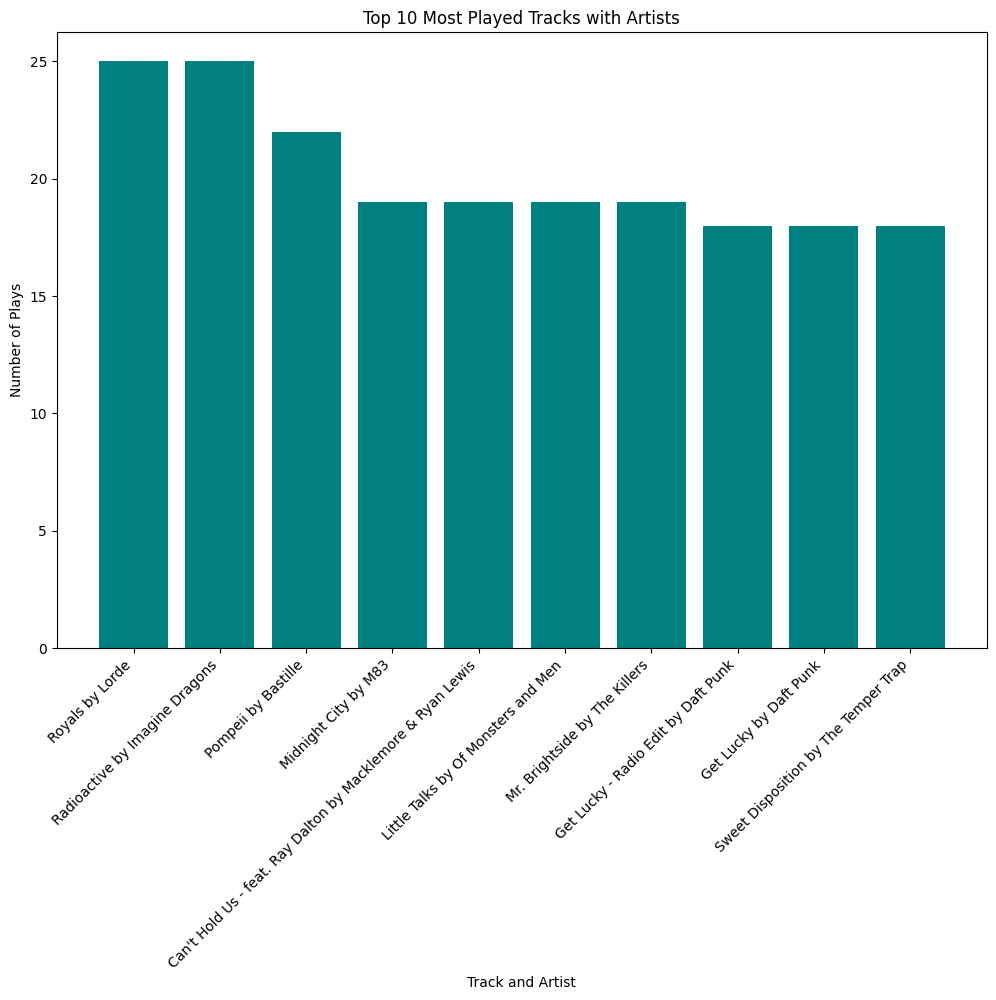

In [ ]:
import matplotlib.pyplot as plt

# Calculate the top 10 most played tracks with artist names
top_tracks = spotify_df[["trackname", "artistname"]].value_counts().head(10)

# Create a bar chart
plt.figure(figsize=(12, 8))  # Set the figure size
plt.bar(top_tracks.index.map(lambda x: f"{x[0]} by {x[1]}"), top_tracks.values, color='teal')  # Plot a bar chart
plt.xlabel('Track and Artist')  # Set the x-axis label
plt.ylabel('Number of Plays')  # Set the y-axis label
plt.title('Top 10 Most Played Tracks with Artists')  # Set the title
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.show()  # Display the plot


In [ ]:
# Printing the longest playlists (playlist names and the number of tracks in each of them)
spotify_df.groupby(["user_id", "playlistname"], as_index=False)['trackname'].nunique().sort_values(by=['trackname'], ascending=False).head(10)

,user_id,playlistname,trackname
13120,4398de6902abde3351347b048fcdc287,Starred,369
37629,c410ee930bd5f0e4893632503ec17b05,Starred,147
20406,68756b4d60b6fac27789e85c2b63d1c6,Starred,145
5445,1c43b609f0b4a55de35803000c86ade0,Starred,114
20954,6b85a8076b4f3b1036ef15f09e2feeeb,Generos,107
216,00dd7fde8040db835d917e077bb47e4b,Starred,100
46410,f2604a69836c94d00fcd11dd602944fc,everything,95
43574,e3833c156aef7b25ba9d8837341a99bb,All Live Files,93
39596,ce7eab9cbb66a49a8b71c751458e8663,Starred,85
27825,8ece433d541d9fac7fbd7c0c6082c7a6,Musica!,84


# Market Basket Analysis Using Apriori

In [ ]:
sample_df = spotify_df.copy()
total_users = sample_df.nunique()[0]
total_users

11825

In [ ]:
artist_heard = pd.DataFrame(sample_df['artistname'].value_counts())

# Add a counter column that represents ID
artist_heard['ID'] = range(1, len(artist_heard) + 1)

artist_heard.columns = ['freq','ID']
artist_heard

,freq,ID
artistname,,
Coldplay,290,1
Daft Punk,257,2
The Rolling Stones,236,3
Kanye West,232,4
Radiohead,228,5
...,...,...
Wouter Hamel,1,26661
Lo Fidelity Allstars,1,26662
Sting & The Police,1,26663


In [ ]:
artist_df = sample_df[['user_id', 'artistname']].copy()

# Perform a self-join based on the 'ID' column
artist_combination_df = artist_df.merge(artist_df, on='user_id', how='left', suffixes=('_left', '_right'))
artist_combination_df

,user_id,artistname_left,artistname_right
0,5c2b840d66d02ac7aa6a069eddd17f48,Spice Girls,Spice Girls
1,5c2b840d66d02ac7aa6a069eddd17f48,Spice Girls,Backstreet Boys
2,5c2b840d66d02ac7aa6a069eddd17f48,Spice Girls,No ID
3,5c2b840d66d02ac7aa6a069eddd17f48,Spice Girls,Sebastian Ingrosso
4,5c2b840d66d02ac7aa6a069eddd17f48,Spice Girls,Christina Aguilera
...,...,...,...
8600638,2ed85d17998475c7955065311d9a291f,Blitzen Trapper,Blitzen Trapper
8600639,f2683f4aa4073b231759f08729ae74e4,blink-182,Thrice
8600640,f2683f4aa4073b231759f08729ae74e4,blink-182,Deftones
8600641,f2683f4aa4073b231759f08729ae74e4,blink-182,Tori Amos


In [ ]:

# Perform the lookup using .map()
artist_combination_df['left_artist_ID'] = artist_combination_df['artistname_left'].map(artist_heard['ID'])
artist_combination_df['right_artist_ID'] = artist_combination_df['artistname_right'].map(artist_heard['ID'])
# Calculate combination counts and add as a new column
artist_combination_df['combination_freq'] = artist_combination_df.groupby(['artistname_left', 'artistname_right']).transform('size')

artist_combination_df2 = artist_combination_df.drop(columns=['user_id'])

# Now, remove duplicates from the DataFrame
artist_combination_df2 = artist_combination_df2.drop_duplicates()

# Reset the index of the new DataFrame if needed
artist_combination_df2.reset_index(drop=True, inplace=True)

artist_combination_df2

,artistname_left,artistname_right,left_artist_ID,right_artist_ID,combination_freq
0,Spice Girls,Spice Girls,810,810,20
1,Spice Girls,Backstreet Boys,810,358,2
2,Spice Girls,No ID,810,25538,1
3,Spice Girls,Sebastian Ingrosso,810,1767,1
4,Spice Girls,Christina Aguilera,810,204,3
...,...,...,...,...,...
6319760,Blitzen Trapper,Namaste,1296,18728,1
6319761,Blitzen Trapper,Fischerspooner,1296,3202,1
6319762,Blitzen Trapper,Birdy Nam Nam,1296,3226,1
6319763,Blitzen Trapper,General Elektriks,1296,4794,1


In [ ]:
artist_combination_df2['left_artist_freq'] = artist_combination_df2['artistname_left'].map(artist_heard['freq'])
artist_combination_df2['right_artist_freq'] = artist_combination_df2['artistname_right'].map(artist_heard['freq'])
artist_combination_df2['Observed_Support'] = artist_combination_df2['combination_freq']/total_users
artist_combination_df2['Expected_Support'] = (artist_combination_df2['left_artist_freq']/total_users) * (artist_combination_df2['right_artist_freq']/total_users)
artist_combination_df2['Lift'] = artist_combination_df2['Observed_Support']/ artist_combination_df2['Expected_Support']
artist_combination_df2['Confidence R_Product | L'] = artist_combination_df2['combination_freq']/artist_combination_df2['right_artist_freq']


artist_combination_df2

,artistname_left,artistname_right,left_artist_ID,right_artist_ID,combination_freq,left_artist_freq,right_artist_freq,Observed_Support,Expected_Support,Lift,Confidence R_Product | L
0,Spice Girls,Spice Girls,810,810,20,20,20,0.001691,2.860604e-06,591.250000,1.000000
1,Spice Girls,Backstreet Boys,810,358,2,20,39,0.000169,5.578177e-06,30.320513,0.051282
2,Spice Girls,No ID,810,25538,1,20,1,0.000085,1.430302e-07,591.250000,1.000000
3,Spice Girls,Sebastian Ingrosso,810,1767,1,20,10,0.000085,1.430302e-06,59.125000,0.100000
4,Spice Girls,Christina Aguilera,810,204,3,20,55,0.000254,7.866660e-06,32.250000,0.054545
...,...,...,...,...,...,...,...,...,...,...,...
6319760,Blitzen Trapper,Namaste,1296,18728,1,13,1,0.000085,9.296962e-08,909.615385,1.000000
6319761,Blitzen Trapper,Fischerspooner,1296,3202,1,13,5,0.000085,4.648481e-07,181.923077,0.200000
6319762,Blitzen Trapper,Birdy Nam Nam,1296,3226,1,13,5,0.000085,4.648481e-07,181.923077,0.200000
6319763,Blitzen Trapper,General Elektriks,1296,4794,1,13,4,0.000085,3.718785e-07,227.403846,0.250000


# Recommendation Engine Based on Apriori Algorithm

In [ ]:
print(artist_combination_df2[artist_combination_df2['artistname_left'] == "Coldplay"].sort_values(by='Observed_Support', ascending=False).head(10)['artistname_right'].tolist())
print(artist_combination_df2[artist_combination_df2['artistname_left'] == "Coldplay"].sort_values(by='Lift', ascending=False).head(10)['artistname_right'].tolist())
print(artist_combination_df2[artist_combination_df2['artistname_left'] == "Coldplay"].sort_values(by='Confidence R_Product | L', ascending=False).head(10)['artistname_right'].tolist())

['Coldplay', 'Muse', 'Daft Punk', 'U2', 'Bruce Springsteen', 'Foo Fighters', 'Death Cab for Cutie', 'The Killers', 'Glee Cast', 'Bob Dylan']
['János Rolla', 'Niels Van Gogh', 'Sound Effect', 'Vladimir Krainev', 'Jeff Beal, The Hollywood Studio Symphony', 'Thomas Rusiak', 'Brett Williams', 'Laura Izibor', 'Necro Facility', 'DJ Molasses']
['János Rolla', 'Niels Van Gogh', 'Sound Effect', 'Vladimir Krainev', 'Jeff Beal, The Hollywood Studio Symphony', 'Thomas Rusiak', 'Brett Williams', 'Laura Izibor', 'Necro Facility', 'DJ Molasses']


# Content Based Recommendation Engine

In [ ]:
# Content based recommendation engine

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Combine 'artistname' and 'trackname' into a single text feature
spotify_df['content'] = spotify_df['artistname'] + ' ' + spotify_df['trackname']

# Create a TF-IDF vectorizer to convert text data into numerical vectors
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(spotify_df['content'])

def content_based_recommendations(liked_songs):
    # Create an empty user profile vector
    user_profile = tfidf_vectorizer.transform([' '.join(liked_songs)])

    # Similarity Measurement
    # Calculate cosine similarities between the user profile and all songs in the dataset
    cosine_similarities = linear_kernel(user_profile, tfidf_matrix).flatten()

    # Recommendation
    # Get the indices of songs sorted by similarity to the user profile
    song_indices = cosine_similarities.argsort()[::-1]

    # Recommend top 10 songs to the user (excluding liked songs and avoiding duplicates)
    recommended_songs = []
    for idx in song_indices:
        song = spotify_df['trackname'].iloc[idx]
        if song not in liked_songs and song not in recommended_songs:
            recommended_songs.append(song)
            if len(recommended_songs) == 10:
                break
    return recommended_songs

# User Profile (Example: Liked Songs)
liked_songs = ["Your Ghost"]
# Print the recommended songs
content_based_recommendations = content_based_recommendations(liked_songs)
print("Recommendations for", liked_songs)

print("Top 10 Recommended Songs:")
for i, song in enumerate(content_based_recommendations, 1):
    print(f"{i}. {song}")


Recommendations for ['Your Ghost']
Top 10 Recommended Songs:
1. Ghost In the Machine
2. Ghost In The Machine
3. Give Up The Ghost
4. Do It Again
5. Ghost
6. Genesis
7. First Time
8. Ghost Song
9. Walk Away
10. Is There A Ghost


# User Based Collaborative Filtering

In [ ]:
spotify_df = df.sample(n=20000, random_state=42)
spotify_df.head()

,user_id,artistname,trackname,playlistname
7578551,5c2b840d66d02ac7aa6a069eddd17f48,Spice Girls,Wannabe - Radio Edit,Lol HiGh Sk00l MeMorIeZ
911963,6da651f45aac18e5da52433aa3c38947,Flying Lotus,Descent Into Madness (feat. Thundercat),Best of 2014
8049506,20350023c94899ce25cd1a86ea385853,Kristin Hersh,Your Ghost,Ladies. All the ladies.
11247838,f9809d1afbab1b0aaa0c2f678a90752a,Rotary Connection,This Town,To listen to
6160700,db9646b77f3a677040b9140489da16f1,Bastille,Pompeii,Starred


In [ ]:
# User-Based Collaborative Filtering

from sklearn.metrics.pairwise import cosine_similarity

# Create a user-item interaction matrix
user_item_matrix = spotify_df.pivot_table(index='user_id', columns='trackname', aggfunc='size', fill_value=0)

# Calculate user similarities using cosine similarity
user_similarity = cosine_similarity(user_item_matrix)

def user_based_collab_filtering(target_user, user_similarity, user_item_matrix):
    # Find the index of the target user directly from the user_item_matrix
    target_user_idx = user_item_matrix.index.get_loc(target_user)

    # Calculate the weighted sum of interactions with other users
    user_scores = user_similarity[target_user_idx]
    recommendations = user_scores.dot(user_item_matrix.values)

    # Filter out songs the target user has already interacted with
    target_user_interactions = user_item_matrix.iloc[target_user_idx]
    recommendations *= (1 - target_user_interactions.values)

    # Get the top recommended songs
    top_recommendations = recommendations.argsort()[::-1][:10]

    # Get the song names
    recommended_songs = user_item_matrix.columns[top_recommendations].tolist()

    return recommended_songs


# Example: Get recommendations for a target user (replace 1 with the actual user ID)
target_user_id = '5c2b840d66d02ac7aa6a069eddd17f48'
user_based_collab_recommendations = user_based_collab_filtering(target_user_id, user_similarity, user_item_matrix)
print(f"Recommended songs for User {target_user_id}:")
print("Top 10 Recommended Songs:")
for i, song in enumerate(user_based_collab_recommendations, 1):
    print(f"{i}. {song}")


Recommended songs for User 5c2b840d66d02ac7aa6a069eddd17f48:
Top 10 Recommended Songs:
1. Chemical Calisthenics
2. ﻿On The Beach
3. Green Light
4. Great Things
5. Greatest Love
6. Green Bottle - Original Mix
7. Green Eyes
8. Green Garden
9. Green Grass & High Tides - Remastered
10. Green Lights


# Item Based Collaborative Filtering

In [ ]:
# Item-Based Collaborative Filtering
# Calculate item similarities using cosine similarity
item_similarity = cosine_similarity(user_item_matrix.T)

def item_based_collab_filtering(target_user, user_item_matrix, item_similarity):
    # Find the index of the target user directly from the user_item_matrix
    target_user_idx = user_item_matrix.index.get_loc(target_user)

    # Get the user's interactions
    user_interactions = user_item_matrix.iloc[target_user_idx].values

    # Calculate the weighted sum of similar items based on user interactions
    item_scores = item_similarity.dot(user_interactions)

    # Filter out items the user has already interacted with by setting those scores to zero
    item_scores[user_interactions > 0] = 0

    # Get the top recommended items (songs)
    top_recommendations = item_scores.argsort()[::-1][:10]

    # Get the song names
    recommended_songs = user_item_matrix.columns[top_recommendations].tolist()

    return recommended_songs


# Example: Get recommendations for a target user (replace 1 with the actual user ID)
target_user_id = '5c2b840d66d02ac7aa6a069eddd17f48'
item_based_recommendations = item_based_collab_filtering(target_user_id, user_item_matrix, item_similarity)
print(f"Recommended songs for User {target_user_id}:")
print("Top 10 Recommended Songs:")
for i, song in enumerate(item_based_recommendations, 1):
    print(f"{i}. {song}")

Recommended songs for User 5c2b840d66d02ac7aa6a069eddd17f48:
Top 10 Recommended Songs:
1. Chemical Calisthenics
2. ﻿On The Beach
3. Green Light
4. Great Things
5. Greatest Love
6. Green Bottle - Original Mix
7. Green Eyes
8. Green Garden
9. Green Grass & High Tides - Remastered
10. Green Lights


# Recommendation Engine using neural networks

In [ ]:
# Recommendation using neural networks
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Dense, Dropout
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode user and track IDs
user_encoder = LabelEncoder()
track_encoder = LabelEncoder()

df = spotify_df.copy()

df['user_idx'] = user_encoder.fit_transform(df['user_id'])
df['track_idx'] = track_encoder.fit_transform(df['trackname'])

df['interaction'] = 1

# Split the data into training and validation sets
X = df[['user_idx', 'track_idx']].values
y = df['interaction'].values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network-based recommendation model
num_users = len(df['user_idx'].unique())
num_tracks = len(df['track_idx'].unique())
embedding_dim = 32  # Adjust as needed

# User embedding layer
user_input = Input(shape=(1,))
user_embedding = Embedding(input_dim=num_users, output_dim=embedding_dim)(user_input)
user_flat = Flatten()(user_embedding)

# Track embedding layer
track_input = Input(shape=(1,))
track_embedding = Embedding(input_dim=num_tracks, output_dim=embedding_dim)(track_input)
track_flat = Flatten()(track_embedding)

# Dot product layer to compute user-track interactions
interaction = Dot(axes=1)([user_flat, track_flat])

# Additional hidden layers for non-linear transformations
dense_layer = Dense(64, activation='relu')(interaction)
dropout_layer = Dropout(0.2)(dense_layer)
output_layer = Dense(1, activation='sigmoid')(dropout_layer)

# Compile the model
model = Model(inputs=[user_input, track_input], outputs=output_layer)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit([X_train[:, 0], X_train[:, 1]], y_train, epochs=10, batch_size=64, validation_data=([X_val[:, 0], X_val[:, 1]], y_val))


Epoch 1/10
250/250 [==============================] - 4s 14ms/step - loss: 0.2880 - accuracy: 0.9977 - val_loss: 0.0547 - val_accuracy: 1.0000
Epoch 2/10
250/250 [==============================] - 3s 14ms/step - loss: 0.0255 - accuracy: 1.0000 - val_loss: 0.0119 - val_accuracy: 1.0000
Epoch 3/10
250/250 [==============================] - 2s 9ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 4/10
250/250 [==============================] - 2s 10ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 5/10
250/250 [==============================] - 2s 10ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 6/10
250/250 [==============================] - 2s 9ms/step - loss: 5.4635e-04 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 7/10
250/250 [==============================] - 3s 13ms/step - loss: 3.0337e-04 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 

In [ ]:
df.head()

,user_id,artistname,trackname,playlistname,user_idx,track_idx,interaction
7578551,5c2b840d66d02ac7aa6a069eddd17f48,Spice Girls,Wannabe - Radio Edit,Lol HiGh Sk00l MeMorIeZ,2697,16552,1
911963,6da651f45aac18e5da52433aa3c38947,Flying Lotus,Descent Into Madness (feat. Thundercat),Best of 2014,3182,3638,1
8049506,20350023c94899ce25cd1a86ea385853,Kristin Hersh,Your Ghost,Ladies. All the ladies.,897,17603,1
11247838,f9809d1afbab1b0aaa0c2f678a90752a,Rotary Connection,This Town,To listen to,7066,15525,1
6160700,db9646b77f3a677040b9140489da16f1,Bastille,Pompeii,Starred,6200,11588,1


In [ ]:
# Make recommendations for users
# Let's make recommendations for a specific user

# Sample user for recommendations (replace with an actual user index)
sample_user_idx = 2697

# Get all track indices
all_track_indices = np.arange(num_tracks)

# Exclude tracks the user has already interacted with
user_interacted_tracks = X_train[X_train[:, 0] == sample_user_idx][:, 1]
tracks_to_recommend = np.setdiff1d(all_track_indices, user_interacted_tracks)

# Predict the likelihood of interaction for the user with all available tracks
user_indices = np.full(tracks_to_recommend.shape, sample_user_idx)
predicted_interaction = model.predict([user_indices, tracks_to_recommend])

# Get the top N recommendations
top_n = 10  # Adjust the number of recommendations as needed
top_indices = np.argpartition(predicted_interaction[:, 0], -top_n)[-top_n:]
recommended_track_indices = tracks_to_recommend[top_indices]

# Decode track indices back to track IDs
recommended_tracks = track_encoder.inverse_transform(recommended_track_indices)

print(f'Recommended tracks for user {user_encoder.inverse_transform([sample_user_idx])[0]}:')
for i, track_id in enumerate(recommended_tracks, 1):
    print(f'{i}. {track_id}')

556/556 [==============================] - 1s 2ms/step
Recommended tracks for user 5c2b840d66d02ac7aa6a069eddd17f48:
1. Spot Rusherz
2. I Run To You
3. 03 devils work
4. Telephone Blues
5. On & On (feat. Maverick Sabre & Dyemond Lewis)
6. Haven't Met You Yet - Jason Nevins Radio Edit
7. Labour of Love - Edit
8. More Makhdoom Khwaja
9. Super Freak
10. Ready for Love (feat. Chloe Angelides) - Original Mix
